<a href="https://colab.research.google.com/github/HuyenNguyenHelen/INFO-5505---Machine-learning/blob/main/LogisticRegression_in-class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My First Machine Learning Model

This template will help you create your fist machine learning model in 5 minutes.


## 0. Setup

We provide the initial setup of the notebook. In this section we import the necessary libraries so you can build your model.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## 1. Load the data

The first step is to load the necessary data. Use the command read_csv from pandas library to load the Iris dataset. After loading the data into a dataframe, show the top of the dataset. The dataset file URL is https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data.

In [ ]:
# load the data
data = pd.read_csv ('/breast-cancer.data')
data.head()

,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no.1
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


## 2. Explore and visualize the data



In [ ]:
data.columns

Index(['no-recurrence-events', '30-39', 'premeno', '30-34', '0-2', 'no', '3',
       'left', 'left_low', 'no.1'],
      dtype='object')

In [ ]:
# Checking missing values
data.isnull().sum()

no-recurrence-events    0
30-39                   0
premeno                 0
30-34                   0
0-2                     0
no                      0
3                       0
left                    0
left_low                0
no.1                    0
dtype: int64

In [ ]:
data.describe()

,3
count,285.000000
mean,2.045614
std,0.737351
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [ ]:
data['no.1'].value_counts()

no     217
yes     68
Name: no.1, dtype: int64

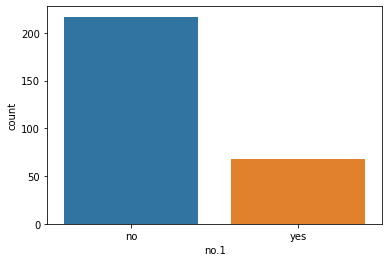

In [ ]:
import seaborn as sns 
sns.countplot(x='no.1', data=data)
plt.show()

## 3. Preprocess the data

In [ ]:
data['no.1']=np.where(data['no.1']=='no', 0,1)
data['no.1'].head()

0    0
1    0
2    0
3    0
4    0
Name: no.1, dtype: int64

In [ ]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
var_names= ['no-recurrence-events', '30-39', 'premeno', '30-34', '0-2', 'no', '3', 'left', 'left_low', 'no.1']
for name in var_names:
  data[name]= label_encoder.fit_transform(data[name]) 
   

In [ ]:
data.head()

,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no.1
0,0,2,2,3,0,1,1,1,5,0
1,0,2,2,3,0,1,1,0,2,0
2,0,4,0,2,0,1,1,1,3,0
3,0,2,2,0,0,1,1,1,4,0
4,0,4,0,2,0,1,1,0,2,0


## 4. Select an algorithm and train the model

### Logistic Regression

In [ ]:
# Split data for training (80%) and testing (20%)
from sklearn.model_selection import train_test_split
X= data[['no-recurrence-events', '30-39', 'premeno', '30-34', '0-2', 'no', '3',
       'left', 'left_low']]
y = data['no.1']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print ('Shapes of X_train, y_train: ', X_train.shape, y_train.shape)
print ('Shapes of X_test, y_test: ', X_test.shape, y_test.shape)

Shapes of X_train, y_train:  (228, 9) (228,)
Shapes of X_test, y_test:  (57, 9) (57,)


In [ ]:

# Build the logistic regression model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

# Fit the model into training set
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Use the model to predict y in the test set
y_test_pred = lr.predict(X_test)

In [ ]:
# Let look into the estimate probability of classess in the test set
y_test_pred_prob = lr.predict_proba (X_test)
print(y_test_pred_prob[:10])
print (y_test[:10])

[[0.58551114 0.41448886]
 [0.30224431 0.69775569]
 [0.92284318 0.07715682]
 [0.88251937 0.11748063]
 [0.73565989 0.26434011]
 [0.59040712 0.40959288]
 [0.40749498 0.59250502]
 [0.91171197 0.08828803]
 [0.84278296 0.15721704]
 [0.77392765 0.22607235]]
224    1
143    0
110    0
48     0
179    1
164    0
182    1
79     0
88     0
27     0
Name: no.1, dtype: int64


In [ ]:
# Evaluate the model with acurracy scores
print('Accuracy of the model in the train set: {:.2f}'.format(lr.score(X_train, y_train)))
print('Accuracy of the model in the test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of the model in the train set: 0.79
Accuracy of the model in the test set: 0.79


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[40,  3],
       [ 9,  5]])

In [ ]:
# Print a performance report of the model 
from sklearn.metrics import classification_report
print('Model performance: \n', classification_report(y_test, y_test_pred))

Model performance: 
               precision    recall  f1-score   support

           0       0.82      0.93      0.87        43
           1       0.62      0.36      0.45        14

    accuracy                           0.79        57
   macro avg       0.72      0.64      0.66        57
weighted avg       0.77      0.79      0.77        57



## 5. Save the model for later use

# Deep Learning